Results for Traders - Original formulation

In [1]:
from Functions_thesis import *
from Functions_plotting import *

#Paramters for config:
T = range(24)
LT=len(T)
eff = 0.9

PW_cap=300 #MWh

SOC_cap = 225 #MWh

P_DIS_CH = 75 #MWh
SOC_init = 0

problem_parameters = {'PW_cap':PW_cap,'SOC_cap':SOC_cap,'P_DIS_CH':P_DIS_CH,'SOC_init':SOC_init,'eff':eff}

n_var=4
n_constraints=10

variables = ['pCH','pDIS','Aux y','SOC']

Target = ['DA_DK2','windpower']

EQUAL = Traders_equality_original("Equality_original", T, problem_parameters, n_var, n_constraints,variables,Target)

reduced_features = ['mean_wind_speed_DK2', 'DA_DK2_Lag', 'mean_temp_DK2']

data, IDS, train_ID, test_ID, features, scaler = load_data('DataV4_shifted.pkl',EQUAL,0.8,problem_parameters,False)

Number of training samples: 790
Number of test samples: 198
PW 1.0
P_DIS_CH 0.25
SOC_init 0.0
SOC_cap 0.75
Efficiency 0.9
Max DA: 871.0


Relaxed stochastic model of Producer's problem

In [2]:
reduced_features = ['mean_wind_speed_DK2','DA_DK2_Lag','mean_temp_DK2']
dataset = dataset_creator(EQUAL,data,IDS,reduced_features)

extract_train_data(EQUAL,train_ID)
extract_test_data(EQUAL,test_ID)

gen_loss_stochastic, loss_stochastic, w_stochastic = traders_relaxation_stochastic(EQUAL,train_ID,test_ID)

Set parameter Username


Academic license - for non-commercial use only - expires 2025-02-20
Features used: ['mean_wind_speed_DK2', 'DA_DK2_Lag', 'mean_temp_DK2']


In [3]:
gen_loss_stochastic

41343.84737069567

Producer's problem

In [4]:
sample_id = 904 #Same sample as earlier in the report
test_ID
idx = np.where(test_ID == sample_id)[0][0] 

In [5]:
# regu = ['Ridge',0.5,0.1]

# gen_loss, w_prediction, predictions_spo, predictions_sequential, dual_prediction, sample_loss, z_realised, B, infeasibles=spo_framework_v2(EQUAL,data,IDS,train_ID,test_ID,reduced_features,True,regularisation=regu)

# # boxplot_spo_loss(sample_loss,infeasibles)

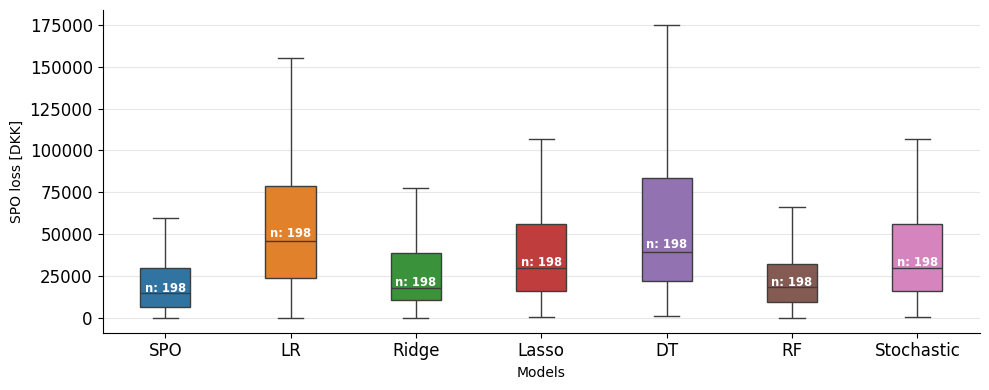

In [6]:
res = pd.read_pickle("Traders_Results_for_report\\tot_res_equal.pkl")
gen_loss = res['gen_loss']
w_prediction = res['w_prediction']
prediction_spo = res['predictions_spo']
prediction_seq = res['predictions_sequential']
dual_prediction = res['dual_prediction']
sample_loss = res['sample_loss']
z_realised = res['z_realised']
B = res['B']
infeasibles = res['infeasibles']

# Define a mapping of old keys to new keys
key_mapping = {
    'SPO - Ridge - 0.5': 'SPO',
    'LR_seq': 'LR',
    'Ridge_seq': 'Ridge',
    'Lasso_seq': 'Lasso',
    'DT_seq': 'DT',
    'RF_seq': 'RF'
}

# Create a new dictionary with renamed keys
sample_loss = {key_mapping.get(k, k): v for k, v in sample_loss.items()}
infeasibles = {key_mapping.get(k, k): v for k, v in infeasibles.items()}

gen_loss['Stochastic'] = gen_loss_stochastic
sample_loss['Stochastic'] = loss_stochastic
infeasibles['Stochastic'] = np.zeros((len(loss_stochastic)))


boxplot_spo_loss(sample_loss,infeasibles,False,True,(10,4),0.4,"Plots\eq_ori_gen_loss_no_outliers")

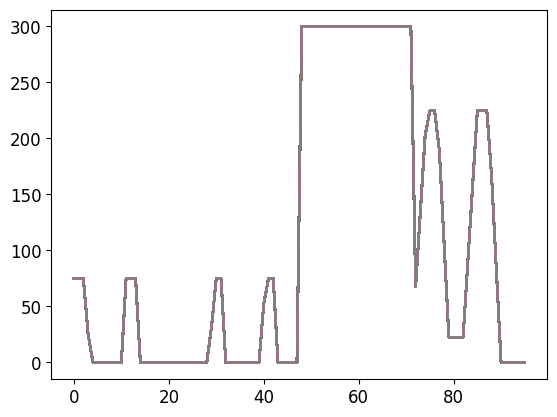

In [7]:
for i in range(len(test_ID)):
    plt.plot(w_prediction['Lasso_seq'][i])
plt.plot(w_stochastic[0])

In [8]:
w_stochastic_scale=w_stochastic*EQUAL.base_scaler
w_stochastic_scale = np.array([w_stochastic_scale for i in range(len(test_ID))])
w_prediction['stochastic'] = w_stochastic_scale

In [9]:
#Feasibility check:
# check_decision = "pw_pch"
# model = 'SPO - Ridge - 2.5'
check_decision = "pch"
i=0
infeasible_prediction=traders_feasibility_check(EQUAL,w_prediction,check_decision,test_ID)

for model in infeasible_prediction.keys():
    print(f"{model}: {np.sum(infeasible_prediction[model])/len(infeasible_prediction[model])*100:.2f} %")
#Tilføj stochastics

SPO - Ridge - 0.5: 65.66 %
Target: 63.13 %
LR_seq: 72.73 %
Ridge_seq: 64.14 %
Lasso_seq: 71.72 %
DT_seq: 67.68 %
RF_seq: 68.69 %
stochastic: 71.72 %


In [10]:
res2 = pd.read_pickle("Traders_Results_for_report\\ori_formulation.pkl")
z_train = res2['z_train']
z_test = res2['z_test']
w_train = res2['w_train']
w_test = res2['w_test']
c_train = res2['c_train']
c_test = res2['c_test']
scaler = res2['scaler']
DA_scaler = res2['DA_scaler']
Base_scaler = res2['Base_scaler']

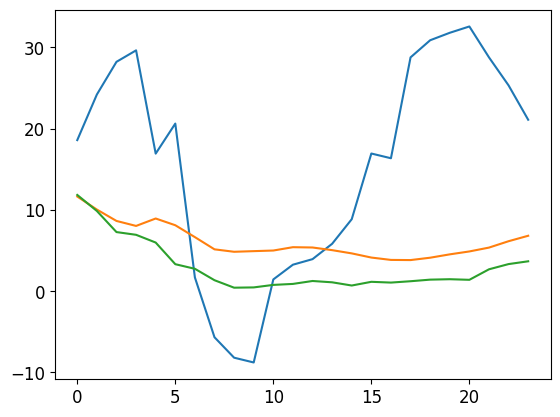

In [11]:
i=0
plt.plot(prediction_seq['LR_seq']['windpower'][i]*Base_scaler)
plt.plot(prediction_seq['RF_seq']['windpower'][i]*Base_scaler)
plt.plot(dataset[test_ID[i]]['windpower']*Base_scaler)

In [14]:
sample_id = 904 #Same sample as earlier in the report
test_ID
idx = np.where(test_ID == sample_id)[0][0] 

In [18]:
data[data['ID']==904]

,DA_DE_Lag,DA_DK2,DA_DK1_Lag,DA_NO2_Lag,DA_SE4_Lag,DA_SE3_Lag,DA_SYSTEM_Lag,RT_DK1_Lag,RT_DK2_Lag,RT_FI_Lag,...,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,Autumn,Spring,Summer,Winter
HourUTC,,,,,,,,,,,,,,,,,,,,,
2024-05-05 00:00:00,0.427615,0.095890,0.401464,0.113563,0.088627,0.088627,0.081165,0.353561,0.688823,0.304861,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 01:00:00,0.428680,0.092411,0.402578,0.114601,0.100127,0.091127,0.082930,0.343654,0.669521,0.304167,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 02:00:00,0.430810,0.085809,0.404805,0.116908,0.139557,0.093615,0.086133,0.320587,0.624581,0.304167,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 03:00:00,0.436426,0.081665,0.410678,0.117328,0.162859,0.096441,0.087979,0.319766,0.622981,0.306667,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 04:00:00,0.433399,0.071366,0.407513,0.116621,0.151219,0.099138,0.089363,0.321214,0.625802,0.308056,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 05:00:00,0.430357,0.063238,0.404332,0.117383,0.151231,0.105080,0.092078,0.331644,0.646123,0.309768,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 06:00:00,0.421940,0.047451,0.395530,0.118796,0.139487,0.115475,0.098402,0.322807,0.628906,0.309583,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 07:00:00,0.410197,0.029426,0.383251,0.119193,0.137336,0.114103,0.097344,0.348683,0.679320,0.310417,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0
2024-05-05 08:00:00,0.394726,0.010712,0.367073,0.110042,0.112255,0.112255,0.091209,0.323681,0.630610,0.310422,...,-0.781831,0.62349,0.826354,-0.563151,0.5,-0.866025,0,1,0,0


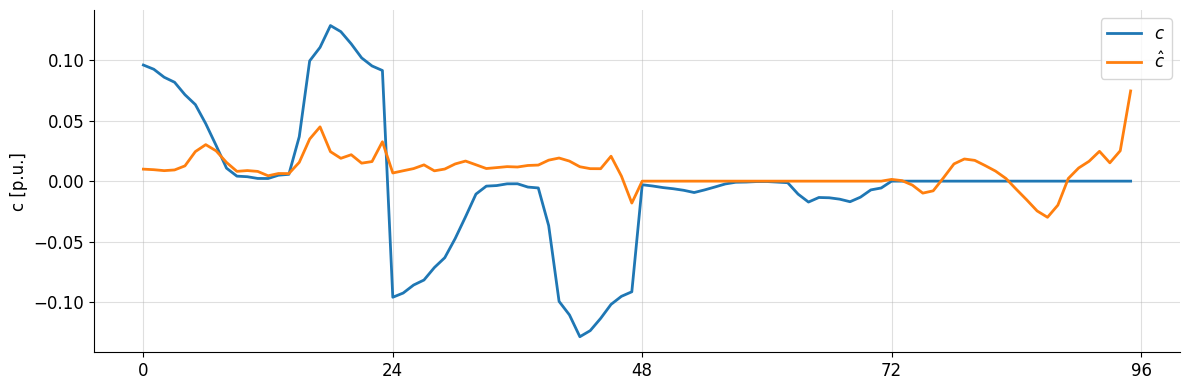

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

x_values = np.arange(0, 24*4)

ax.plot(prediction_spo['Target'][idx],label="${c}$",color="C0",linewidth=2)
ax.plot(prediction_spo['SPO - Ridge - 0.5'][idx],label="$\hat{c}$",color="C1",linewidth=2)
ax.set_ylabel("c [p.u.]")
ax.grid(alpha=0.4)
ax.legend()
ax.set_xticks([0, 24, 48, 72, 96])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend()
plt.tight_layout()
fig.set_facecolor(color='white')
plt.savefig("Plots\\c_vector_traders_with_prediction.png",dpi=300)

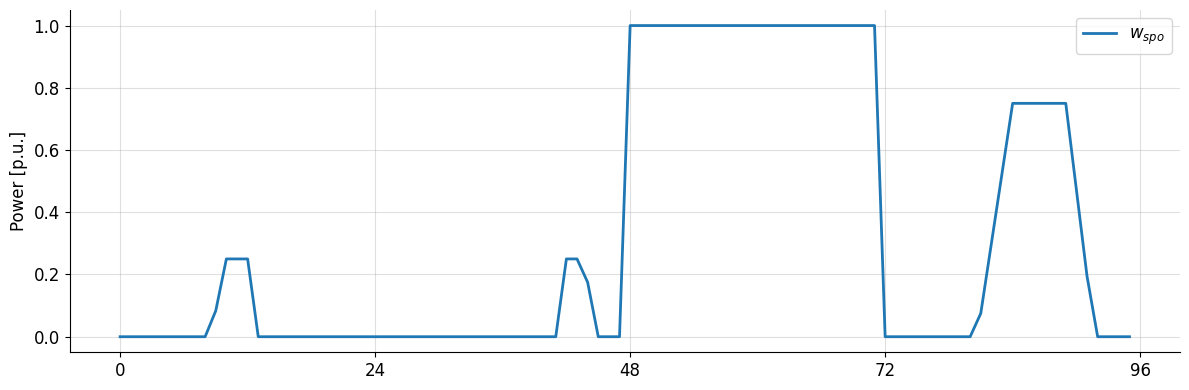

In [32]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

x_values = np.arange(0, 24*4)

ax.plot(w_prediction['Target'][idx]/Base_scaler,label="$w_{spo}$",color="C0",linewidth=2)
# ax.plot(prediction_spo['SPO - Ridge - 0.5'][idx],label="$\hat{c}_{spo}$",color="C1",linewidth=2)
ax.set_ylabel("Power [p.u.]")
ax.grid(alpha=0.4)
ax.legend()
ax.set_xticks([0, 24, 48, 72, 96])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend()
plt.tight_layout()
fig.set_facecolor(color='white')
plt.savefig("Plots\\w_vector_traders.png",dpi=300)

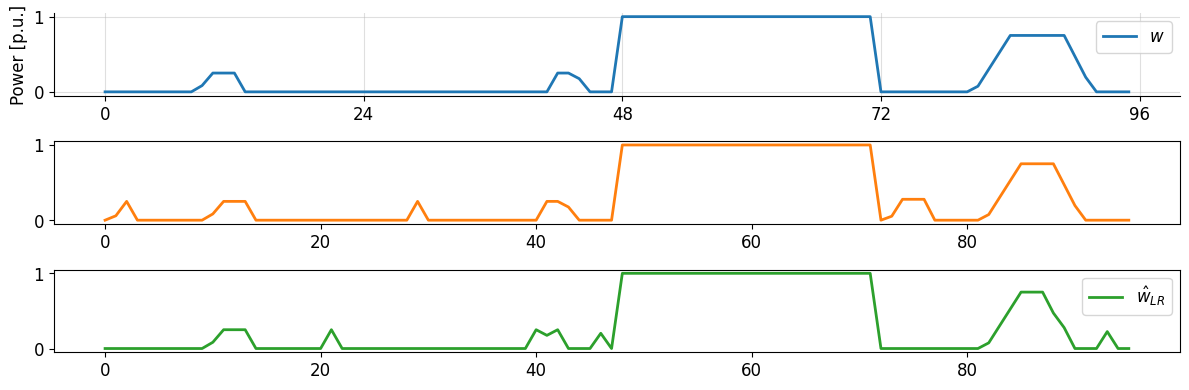

In [13]:
# w_prediction['SPO - Ridge - 0.5'][0]/Base_scaler

fig, ax = plt.subplots(3,1,figsize=(12,4))

x_values = np.arange(0, 24*4)

ax[0].plot(w_prediction['Target'][idx]/Base_scaler,label="${w}$",color="C0",linewidth=2)
ax[1].plot(w_prediction['SPO - Ridge - 0.5'][idx]/Base_scaler,label="$\hat{w}_{spo}$",color="C1",linewidth=2)
ax[2].plot(w_prediction['LR_seq'][idx]/Base_scaler,label="$\hat{w}_{LR}$",color="C2",linewidth=2)
ax[0].set_ylabel("Power [p.u.]")
ax[0].grid(alpha=0.4)
ax[0].legend()
ax[0].set_xticks([0, 24, 48, 72, 96])
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
plt.legend()
plt.tight_layout()
fig.set_facecolor(color='white')
# plt.savefig("Plots\\w_vector_traders_with_prediction.png",dpi=300)

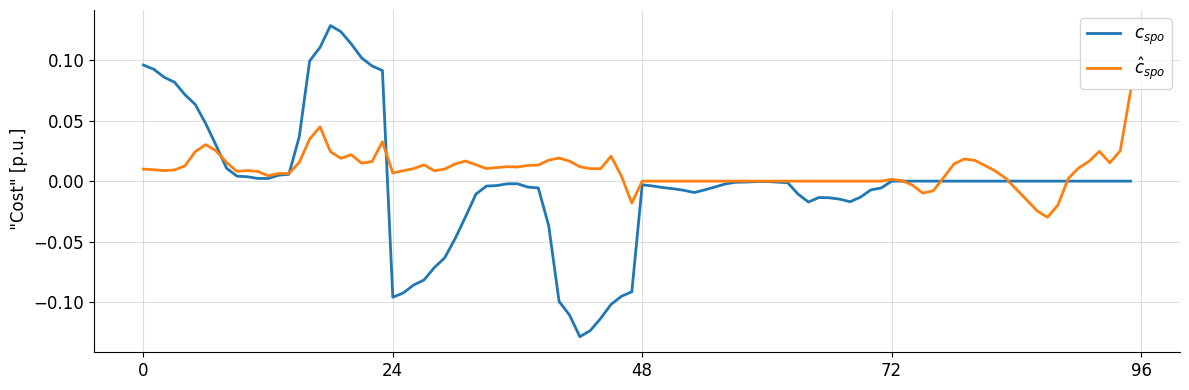

In [14]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

x_values = np.arange(0, 24*4)

ax.plot(prediction_spo['Target'][idx],label="${c}_{spo}$",color="C0",linewidth=2)
ax.plot(prediction_spo['SPO - Ridge - 0.5'][114],label="$\hat{c}_{spo}$",color="C1",linewidth=2)
ax.set_ylabel(" \"Cost\" [p.u.]")
ax.grid(alpha=0.4)
ax.legend()
ax.set_xticks([0, 24, 48, 72, 96])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend()
plt.tight_layout()
fig.set_facecolor(color='white')
plt.savefig("Plots\\c_vector_traders_with_prediction.png",dpi=300)

In [15]:
print(np.mean(z_train*scaler))
print(np.mean(z_test*scaler))

-1647861.9383116267
-873052.2159634352


Sequential models on full data set (MSE)

In [16]:
from sklearn.metrics import root_mean_squared_error

In [18]:
# predictions_sequential, mse_sequential,MSE = sequential_models_v2(
#     EQUAL, Target, data, train_ID, test_ID, reduced_features, [0.5, 0.1])

# mse_seq={}
# for model_name in predictions_sequential.keys():
#     mse_seq[model_name] = {targ: [root_mean_squared_error(
#         EQUAL.dataset[test_ID[i]][targ], predictions_sequential[model_name][targ][i]) for i in range(len(test_ID))] for targ in EQUAL.Target}

In [19]:
# mse_seq={}
# for model_name in predictions_sequential.keys():
#     mse_seq[model_name] = {'windpower': [mean_squared_error(
#         EQUAL.dataset[test_ID[i]]['windpower']*Base_scaler, predictions_sequential[model_name]['windpower'][i]*Base_scaler) for i in range(len(test_ID))]}
    
# for model_name in predictions_sequential.keys():
#     mse_seq[model_name]['DA_DK2']=[mean_squared_error(
#         EQUAL.dataset[test_ID[i]]['DA_DK2']*DA_scaler, predictions_sequential[model_name]['DA_DK2'][i]*DA_scaler) for i in range(len(test_ID))]

In [20]:
# for model in mse_seq.keys():
#     print(f"{model}")
#     for targ in Target:
#         print(f"{targ} : {np.mean(mse_seq[model][targ])}")